In [1]:
%pylab inline
import numdifftools as nd
import scipy as sp
from scipy.integrate import odeint,quad 
import time
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
os.system('say "Hello, Professor Connolly. It is I, Jupiter Notebook. I am now sentient."');

### 1. [6 pts] We used three equations when deriving the Friedman equations: ###
$$ \frac{\ddot a(t)}{a(t)} = \frac{-4\pi G}{3c^{2}}[\epsilon (t)+3P(t)]$$


$$(\frac{\dot a(t)}{a(t)})^{2} = \frac{8\pi G\epsilon (t)}{3c^{2}}-\frac{kc^{2}}{a(t)^{2}} $$


$$\dot \epsilon (t) + \frac{3\dot a(t)}{a(t)}(\epsilon (t)+ P(t)) = 0   $$

### In fact only two of these are independent. Show how we get the 3rd of these equations from the first two. ###

$$(\frac{\dot a(t)}{a(t)})^{2} = \frac{8\pi G\epsilon (t)}{3c^{2}}-\frac{kc^{2}}{a(t)^{2}} $$

$$\dot a(t)^{2} = \frac{8\pi G \epsilon (t)}{3c^2}a(t)^{2} - kc^{2}$$

$$\frac{d}{dt}\dot a(t)^{2} = \frac{8\pi G}{3c^{2}}\frac{d}{dt}\epsilon (t) a(t)^{2} - \frac{d}{dt}kc^{2} $$

$$2\dot a(t)\ddot a(t) = \frac{8\pi G}{3c^{2}}(\dot\epsilon (t)a(t)^{2}+2a(t)\dot a(t)\epsilon (t)) - 0 $$

$$\frac{2\dot a(t)\ddot a(t)}{a(t)} = \frac{8\pi G}{3c^{2}}\frac{1}{a(t)}(\dot\epsilon (t)a(t)^{2}+2a(t)\dot a(t)\epsilon (t)) $$

$$2\dot a(t) \frac{\ddot a(t)}{a(t)} = \frac{8\pi G}{3c^{2}}(\dot \epsilon (t)a(t) + 2\dot a(t)\epsilon (t)) $$

$$\frac{\ddot a(t)}{a(t)} = \frac{8\pi G}{3c^{2}}\frac{1}{2\dot a(t)}(\dot \epsilon (t)a(t) + 2\dot a(t)\epsilon (t)) = \frac{-4\pi G}{3c^{2}}(\epsilon (t)+3P(t)) $$

$$8(\frac{\dot\epsilon (t)a(t)}{2\dot a(t)}+\epsilon (t)) = -4(\epsilon (t)+3P(t)) $$

$$2(\frac{\dot\epsilon (t)a(t)}{2\dot a(t)}+\epsilon (t)) = -(\epsilon (t)+3P(t)) $$

$$\dot \epsilon (t)\frac{a(t)}{\dot a(t)}+2\epsilon (t)+\epsilon (t)+3P(t) = 0 $$

$$\dot \epsilon (t) + \frac{3\dot a(t)}{a(t)}\epsilon(t) +\frac{3\dot a(t)}{a(t)}P(t)=0$$



$$\dot \epsilon (t) + \frac{3\dot a(t)}{a(t)}(\epsilon (t)+ P(t)) = 0 \space \space\therefore   $$

### 2. [10 pts] Using your understanding of how to integrate (from the second homework) write a program that integrates the Friedman equation, ###

$$(\frac{H(z)}{H_{0}})^{2} = (\Omega_{r,0}(1+z)^{4} + \Omega_m,0(1+z)^{3} + \Omega_{\Lambda,0}+(1-\Omega_{0}(1+z)^{2})  $$


### Using this program calculate and plot (a) the comoving distance from z=0 to 10 (b) the age of the universe (at a given redshift) from z=0 to z=10. Calculate these results for the two universes given below ###

### (a) a flat universe with $\Omega_{m,0} = 0.3$,  $\Omega_{r,0} = 0$, $\Omega_{\Lambda} = 0.7$.###
### (b) a closed universe with $\Omega_{m,0} = 10.0$, $\Omega_{r,0} = 0$, $\Omega_{\Lambda} = 0$. ###

### Note: to calculate the age of the universe remember that H(z) is directly related to $\frac{dz}{dt}$. Use $H_{0} = 70 km s^{-1}Mpc^{-1}$ in your calculations and plot the age in Gyr. ###


### The comoving distance is given by: $r(z) = \int^{z}_{0}\frac{cdz}{H(z)}$ ###

In [2]:
#Function for comoving distance/Flat Universe
def invH_F(z):
    H0 = 70.0 #km/s/MPc
    c = 2.99792458e+5 #km/s
    #Dimensionless density parameters
    Omega_m = 0.3
    Omega_r = 0.0
    Omega_L = 0.7
    Omega_0 = Omega_m + Omega_r + Omega_L
    H = H0*np.sqrt((Omega_r*((1+z)**4))+(Omega_m*((1+z)**3))+(Omega_L)+((1-Omega_0)*((1+z)**2)))
    invH = c/H
    return invH
def r_flat(z):
    if type(z) == numpy.ndarray:
        rflat = []
        for val in z:
            x = sp.integrate.quad(invH_F,0,val)[0]
            rflat.append(x)
        return rflat
    elif type(z) == float:
        r = sp.integrate.quad(invH_F,0,z)[0]
        return r   
#Function for comoving distance/Closed Universe
def invH_C(z):
    H0 = 70.0 #km/s/MPc
    c = 2.99792458e+5 #km/s
    #Dimensionless density parameters
    Omega_m = 10.0
    Omega_r = 0.0
    Omega_L = 0.0
    Omega_0 = Omega_m + Omega_r + Omega_L
    H = H0*np.sqrt((Omega_r*((1+z)**4))+(Omega_m*((1+z)**3))+(Omega_L)+((1-Omega_0)*((1+z)**2)))
    invH = c/H
    return invH
def r_closed(z):
    if type(z) == numpy.ndarray:
        rclosed = []
        for val in z:
            x = sp.integrate.quad(invH_C,0,val)[0]
            rclosed.append(x)
        return rclosed
    elif type(z) == float:
        r = sp.integrate.quad(invH_C,0,z)[0]
        return r  

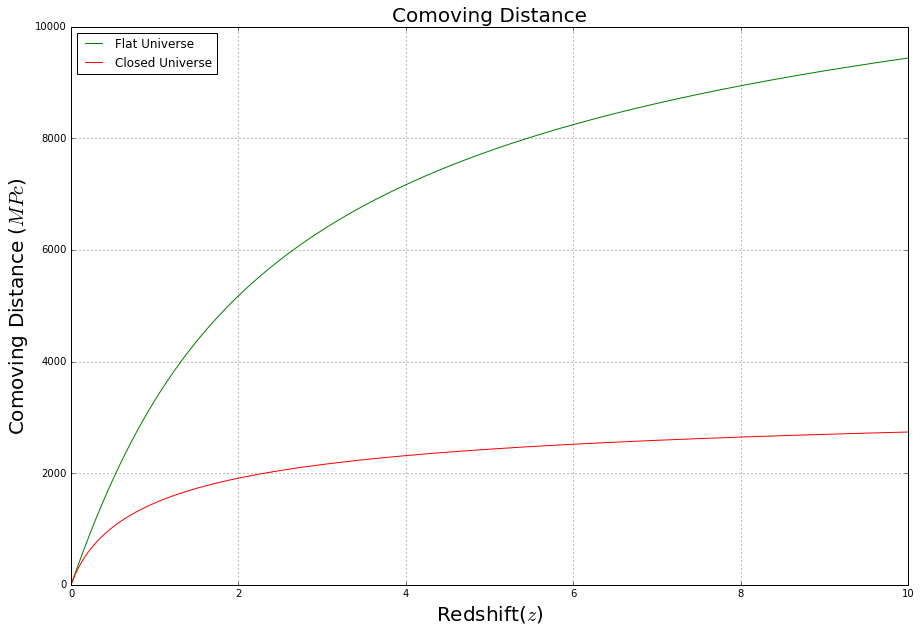

In [3]:
z = linspace(0,10,1000)
fig,ax = subplots(1,1)
fig.set_size_inches(15,10)
ax.set_title("Comoving Distance",fontsize=20)
ax.set_xlabel("Redshift($z$)",fontsize=20)
ax.set_ylabel("Comoving Distance ($MPc$)",fontsize=20)
ax.plot(z,r_flat(z),color='g',label="Flat Universe")
ax.plot(z,r_closed(z),color='r',label="Closed Universe")
ax.grid()
ax.legend(loc=2);

### The lookback time is given by: $t = \int^{z}_{0}\frac{dz}{H(z)(1+z)}$

In [4]:
#Function for lookback time - Flat Universe
def HFlat(z):
    H0 = 7.158e-2 #1/Gyrs
    #Dimensionless density parameters
    Omega_m = 0.3
    Omega_r = 0.0
    Omega_L = 0.7
    Omega_0 = Omega_m + Omega_r + Omega_L
    H = H0*np.sqrt((Omega_r*((1+z)**4))+(Omega_m*((1+z)**3))+(Omega_L)+((1-Omega_0)*((1+z)**2)))
    invH = 1.0/(H*(1+z))
    return invH
def t_flat(z):
    if type(z) == numpy.ndarray:
        rflat = []
        for val in z:
            x = sp.integrate.quad(HFlat,0,val)[0]
            rflat.append(x)
        return rflat
    elif type(z) == float:
        r = sp.integrate.quad(HFlat,0,z)[0]
        return r   
#Function for lookback time - Closed Universe
def HClosed(z):
    H0 = 7.158e-2 #1/Gyr
    #Dimensionless density parameters
    Omega_m = 10.0
    Omega_r = 0.0
    Omega_L = 0.0
    Omega_0 = Omega_m + Omega_r + Omega_L
    H = H0*np.sqrt((Omega_r*((1+z)**4))+(Omega_m*((1+z)**3))+(Omega_L)+((1-Omega_0)*((1+z)**2)))
    invH = 1.0/(H*(1+z))
    return invH
def t_closed(z):
    if type(z) == numpy.ndarray:
        rflat = []
        for val in z:
            x = sp.integrate.quad(HClosed,0,val)[0]
            rflat.append(x)
        return rflat
    elif type(z) == float:
        r = sp.integrate.quad(HClosed,0,z)[0]
        return r  

In [5]:
lookback_closed = array(t_closed(z))
lookback_flat = array(t_flat(z))
age_closed = t_closed(10000.0)-lookback_closed
age_flat = t_flat(10000.0)-lookback_flat

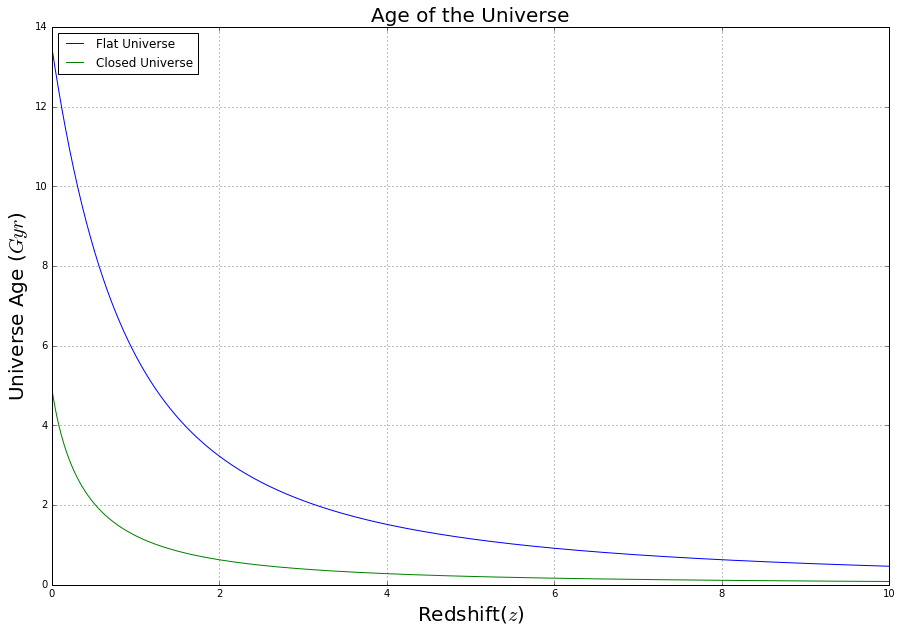

In [6]:
fig,ax = subplots(1,1)
ax.plot(z,age_flat,label="Flat Universe")
ax.plot(z,age_closed,label="Closed Universe")
fig.set_size_inches(15,10)
ax.set_title("Age of the Universe",fontsize=20)
ax.set_xlabel("Redshift($z$)",fontsize=20)
ax.set_ylabel("Universe Age ($Gyr$)",fontsize=20)
ax.legend(loc=2)
ax.grid()

### 3. [4 pts] Use the program to find the value of Ωr for a radiation only open universe (no cosmological constant) that would give the same age of the universe (for the current day) as our benchmark flat universe with Ωm,0 = 0.3, ΩΛ,0=0.7 ###

In [7]:
#Lookback time for a radiation only universe
def Hrad(z,x):
    H0 = 7.158e-2 #1/Gyrs
    #Dimensionless density parameters
    Omega_m = 0.0
    Omega_r = x
    Omega_L = 0.0
    Omega_0 = Omega_m + Omega_r + Omega_L
    H = H0*np.sqrt((Omega_r*((1+z)**4))+(Omega_m*((1+z)**3))+(Omega_L)+((1-Omega_0)*((1+z)**2)))
    invH = 1.0/(H*(1+z))
    return invH
def trad(z,x):
    if type(z) == numpy.ndarray:
        rflat = []
        for val in z:
            x = sp.integrate.quad(Hrad,0,val,args=(x))[0]
            rflat.append(x)
        return rflat
    elif type(z) == float:
        r = sp.integrate.quad(Hrad,0,z,args=(x))[0]
        return r

In [8]:
t = linspace(0,1,1000000)
for val in t:
    x = trad(10000.0,val)
    y = t_flat(10000.0)
    z = x-y
    if abs(z)<=10e-5:
        print("The radiation density of the radiation-only universe with the same age as the canonical universe is %s"% val)
        break


The radiation density of the radiation-only universe with the same age as the canonical universe is 0.001387001387
